In [1]:
import pandas as pd
import numpy as np
import time
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from collections import Counter

### Load data

In [2]:
df = pd.read_csv('Data/3_ai_extraction.csv')
#df = df.head(3000)
df.fillna("", inplace=True)
print(df.shape)
df.head(10)

(11184, 10)


,job_title,location,job_description,career_level,qualification,experience,job_type,hard skills,tools,programming skills
0,data analyst,johor bahru,zempot malaysia sdn bhd is a newly branched co...,non-executive,"professional certificate, diploma, advanced/hi...",not specified,full-time,"['data analytics', 'knowledge in online table ...",['MS Excel'],[]
1,director- data analytics,petaling jaya,job overviewwe are looking for a highly motiva...,senior manager,not specified,12 years,full-time,"['data science', 'business intelligence', 'mac...","['data robot', 'visualisation tools', 'Tableau...","['Python', 'SQL']"
2,solutions architect - data lake specialist (ba...,kuala lumpur,we are looking for a solutions architect who s...,senior executive,"bachelor's degree, post graduate diploma, prof...",8 years,full-time,"['data lake architecture', 'data modelling', '...","['Hadoop', 'Spark', 'NoSQL databases', 'AWS S3...",[]
3,automotive analyst – vehicle valuation,kuala lumpur,descriptionthe automotive analyst will be acco...,senior executive,"diploma, advanced/higher/graduate diploma, bac...",3 years,full-time,"['data analysis', 'market research', 'database...","['personal computer', 'word processing', 'pres...",[]
4,it business analyst,kuala lumpur,position objective:-responsible to be the it b...,senior executive,not specified,4 years,full-time,,,
5,system analyst,kuala lumpur,job purpose as part of our expansion plan in m...,junior executive,"bachelor's degree, post graduate diploma, prof...",2 years,full-time,"['programming languages like mysql', 'database...","['mysql', 'redis', 'mongodb', 'uipath', 'pytor...","['mysql', 'uipath', 'pytorch', 'spacy']"
6,data scientist / artificial intelligence assoc...,kuching,job summarywe are looking for a data scientist...,senior executive,"bachelor's degree, post graduate diploma, prof...",2 years,full-time,"['machine learning', 'deep learning', 'data qu...","['GitHub', 'Jenkins', 'Docker', 'Python Dash']","['Python', 'Object-oriented programming']"
7,data engineer (business intelligence),kuala lumpur,"why us?in aia digital+, we serve as aia’s grou...",junior executive,not specified,2 years,full-time,"['BI ETL', 'DWH projects', 'Informatica', 'Azu...","['Informatica', 'Azure ADF', 'SQL Server Manag...","['SQL', 'PL/SQL', 'T-SQL', 'Python', 'Java']"
8,"analyst, it business",selangor,job responsibilities:identify the needs of the...,junior executive,"bachelor's degree, post graduate diploma, prof...",not specified,full-time,,"['data analysis tools', 'project management so...",
9,associate executive - data management & system...,sarawak,job description:handling pmsys (performance ma...,junior executive,"bachelor's degree, post graduate diploma, prof...",3 years,full-time,,"['pmsys', 'Microsoft Office']",


### Tokenize

In [3]:
def tokenize(X):
    #convert to lowercase
    X = X.str.lower()
    
    #Remove punctuation
    X =  X.str.replace('\[','', regex=True) 
    X =  X.str.replace(']','', regex=True) 
    X =  X.str.replace('\(','', regex=True) 
    X =  X.str.replace('\)','', regex=True) 
    X =  X.str.replace("'",'', regex=True) 
    
    #tokenize
    group = []
    for i in range(len(X)):     
        sent = X[i].split(',')
        sent = [element.strip() for element in sent if len(element.split()) <= 5] # phrases that consist of a maximum of 5 words were extracted. 
        group = group + sent
    group =  [x for x in group if x != ""]
   
    return group

In [4]:
hard_skills = tokenize(df['hard skills'])
print('number of hard skills:', len(hard_skills))
tools =  tokenize(df['tools'])
print('number of tools:', len(tools))
programming =  tokenize(df['programming skills'])
print('number of programming skills', len(programming))

skillset = hard_skills+tools+programming
print('total skillset:', len(skillset))
skillset[:10]

number of hard skills: 17895
number of tools: 33247
number of programming skills 1502
total skillset: 52644


['data analytics',
 'knowledge in online table game',
 'ms excel proficiency',
 'data science',
 'business intelligence',
 'machine learning',
 'statistical modelling',
 'python',
 'sql',
 'data robot']

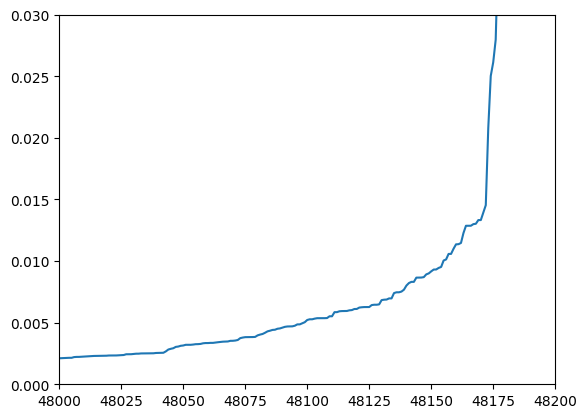

In [31]:
def nn(data):
    neigh = NearestNeighbors(n_neighbors=10)
    nbrs = neigh.fit(data)
    distances, indices = nbrs.kneighbors(data)
    distances = np.sort(distances, axis=0)
    distances = distances[:,1]
    plt.plot(distances)
    plt.xlim(48000, 48200)
    plt.ylim(0,0.03)
    #plt.xscale('log', base = 2)
    plt.show()

nn(pca_tfidf)

45.212 s
Silhouette Coefficient(close to 1 is better): 0.626
Davies Bouldin Score(lower is better): 1.039
number of clusters:  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, -1}


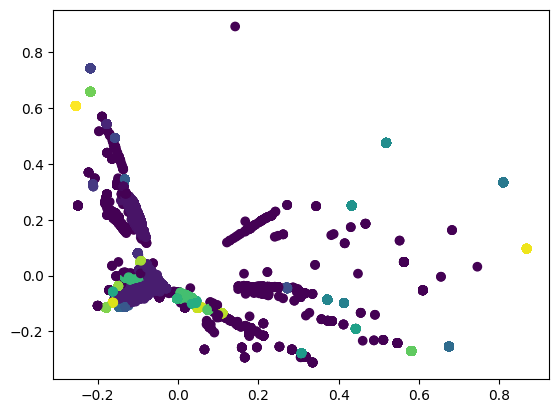

In [21]:
# Epsilon: radius of local neighborhood. n_clu: minimum density threshold.
epsilon, n_clu = 0.01, 50

# build model
start = time.time()
dbscan = DBSCAN(eps = epsilon, min_samples = n_clu)
dbscan.fit(pca_tfidf)
end = time.time()
print(round(end-start, 3), 's')

print("Silhouette Coefficient(close to 1 is better): %0.3f"
      % metrics.silhouette_score(pca_tfidf, dbscan.labels_))
print("Davies Bouldin Score(lower is better): %0.3f"
      % metrics.davies_bouldin_score(pca_tfidf, dbscan.labels_))
print('number of clusters: ', set(dbscan.labels_))

#plot the clustering 
plt.scatter(pca_tfidf[:,0], pca_tfidf[:,1], c=dbscan.labels_)
plt.show()

Silhouette Coefficient(close to 1 is better): 0.676
Davies Bouldin Score(lower is better): 0.442


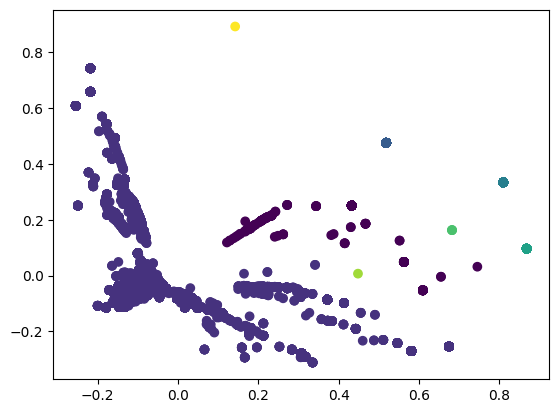

In [36]:
from sklearn.cluster import AgglomerativeClustering
agglomerative = AgglomerativeClustering(n_clusters= 8, linkage='single')
agglomerative.fit_predict(pca_tfidf)

print("Silhouette Coefficient(close to 1 is better): %0.3f"
      % metrics.silhouette_score(pca_tfidf, agglomerative.labels_))
print("Davies Bouldin Score(lower is better): %0.3f"
      % metrics.davies_bouldin_score(pca_tfidf, agglomerative.labels_))

#plot the clustering 
plt.scatter(pca_tfidf[:,0], pca_tfidf[:,1], c=agglomerative.labels_)
plt.show()

## word2vec: (single word)

In [1]:
#tokenize phrase into words
import nltk
from nltk.tokenize import word_tokenize
skills = [word_tokenize(i) for i in skillset]

#word embedding
import gensim
#CBOW (Continuous Bag of Words) Model
model = gensim.models.Word2Vec(skills, min_count=3) #set vector length
print(type(model.wv.vectors), 'length of vectors: ', len(model.wv.vectors))

NameError: name 'skillset' is not defined

In [24]:
vocab = model.wv.index_to_key
vectors = model.wv[vocab]
print(len(model.wv), vectors.size)

#keys/vocabularies
skill_df = pd.DataFrame(list(vocab))
skill_df

2597 259700


,0
0,software
1,microsoft
2,management
3,data
4,office
...,...
2592,aoi
2593,utilities
2594,aga
2595,n


In [25]:
model.wv.most_similar('data')
#model.wv.vectors.shape

[('financial', 0.9105396866798401),
 ('risk', 0.8343233466148376),
 ('tools', 0.8171834945678711),
 ('statistical', 0.8167712092399597),
 ('variance', 0.807360827922821),
 ('cost', 0.8022772669792175),
 ('cause', 0.7817244529724121),
 ('spreadsheet', 0.7735651135444641),
 ('trend', 0.7716611623764038),
 ('accounting', 0.7703420519828796)]

### PCA

In [26]:
pca = PCA(n_components = 2)
pca_result = pca.fit_transform(vectors) #lenth = vectors

### K-means

Silhouette Coefficient(close to 1 is better): 0.629
Davies Bouldin Score(lower is better): 0.544


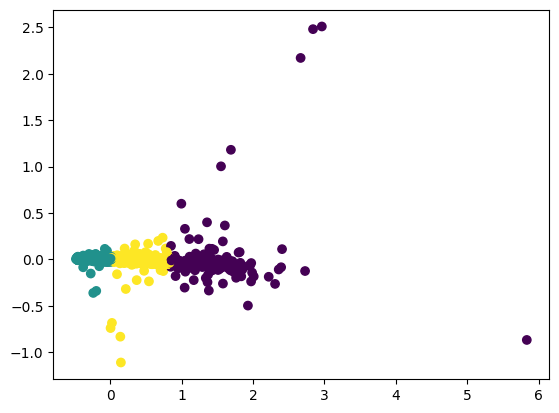

In [35]:
km = KMeans(n_clusters=3, n_init=10)        # instantiate model
km.fit(pca_result)                          # fit model to data 
y_KMeans = km.predict(pca_result)           # Determine cluster labels

print("Silhouette Coefficient(close to 1 is better): %0.3f"
      % metrics.silhouette_score(pca_result, km.labels_))
print("Davies Bouldin Score(lower is better): %0.3f"
      % metrics.davies_bouldin_score(pca_result, km.labels_))

#plot the clustering 
plt.scatter(pca_result[:,0], pca_result[:,1], c=km.labels_)
plt.show()

In [ ]:
top = 10

a = result[result['kmeans']==0]
print(a.value_counts().head(top))

a = result[result['kmeans']==1]
print(a.value_counts().head(top))

a = result[result['kmeans']==2]
print(a.value_counts().head(top))

a = result[result['kmeans']==3]
print(a.value_counts().head(top))

### DBSCAN

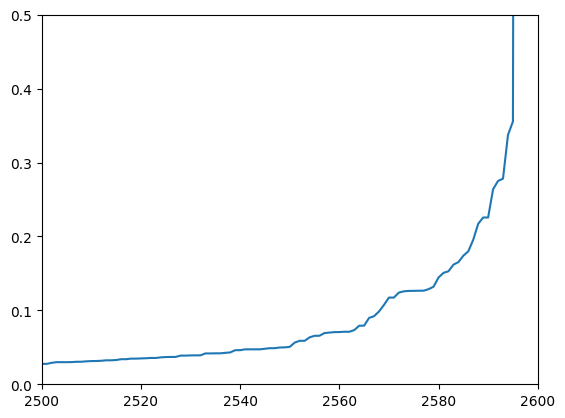

In [36]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
def nn(data):
    neigh = NearestNeighbors(n_neighbors=10)
    nbrs = neigh.fit(data)
    distances, indices = nbrs.kneighbors(data)
    distances = np.sort(distances, axis=0)
    distances = distances[:,1]
    plt.plot(distances)
    plt.xlim(2500, 2600)
    plt.ylim(0,0.5)
    #plt.xscale('log', base = 2)
    plt.show()

nn(pca_result)

0.068 s
Silhouette Coefficient(close to 1 is better): 0.759
Davies Bouldin Score(lower is better): 0.763
number of clusters:  {0, -1}


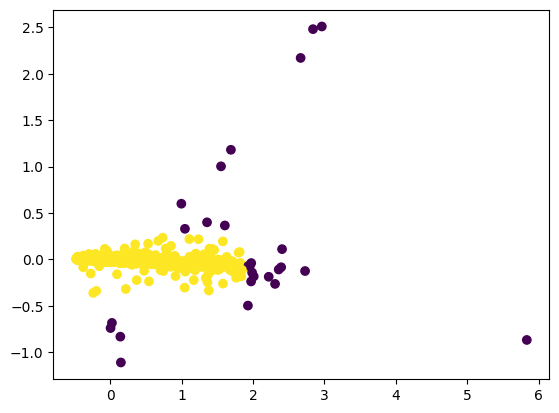

In [46]:
# Epsilon: radius of local neighborhood. n_clu: minimum density threshold.
epsilon, n_clu = 0.25, 50

# build model
start = time.time()
dbscan = DBSCAN(eps = epsilon, min_samples = n_clu)
dbscan.fit(pca_result)
end = time.time()
print(round(end-start, 3), 's')

print("Silhouette Coefficient(close to 1 is better): %0.3f"
      % metrics.silhouette_score(pca_result, dbscan.labels_))
print("Davies Bouldin Score(lower is better): %0.3f"
      % metrics.davies_bouldin_score(pca_result, dbscan.labels_))
print('number of clusters: ', set(dbscan.labels_))

#plot the clustering 
plt.scatter(pca_result[:,0], pca_result[:,1], c=dbscan.labels_)
plt.show()